<a href="https://colab.research.google.com/github/alirezarahimi1393/Image-Processing-Projects/blob/main/Image_processing3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

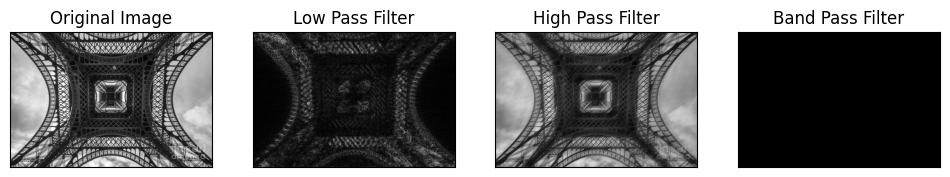

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# خواندن تصویر
img = cv2.imread('/content/Eiffeltower.jpg', cv2.IMREAD_GRAYSCALE)

# انجام تبدیل فوریه
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# اعمال فیلترهای پایین گذر، بالا گذر و میان گذر
# شعاع دایره ها
radii = [(100, 50), (500, 200), (150, 250)]
filtered_images = []

for radius in radii:
    filter_mask = np.zeros(img.shape)
    center_x, center_y = img.shape[0] // 2, img.shape[1] // 2
    cv2.circle(filter_mask, (center_x, center_y), radius[0], 1, -1)  # Inner circle
    cv2.circle(filter_mask, (center_x, center_y), radius[1], 0, -1)  # Outer circle

    fshift_filtered = fshift * filter_mask
    f_filtered = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_filtered)
    img_filtered = np.abs(img_filtered)
    filtered_images.append(img_filtered)

# نمایش تصویر اصلی و تصاویر حاصل از اعمال فیلترها
plt.figure(figsize=(12, 4))

plt.subplot(141), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(142), plt.imshow(filtered_images[0], cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])

plt.subplot(143), plt.imshow(filtered_images[1], cmap='gray')
plt.title('High Pass Filter'), plt.xticks([]), plt.yticks([])

plt.subplot(144), plt.imshow(filtered_images[2], cmap='gray')
plt.title('Band Pass Filter'), plt.xticks([]), plt.yticks([])

plt.show()
